<a href="https://colab.research.google.com/github/FujiPy/FujiPy.github.io/blob/main/Keyword_googlesearch_sentiment_analyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
!pip install spacy
!python -m spacy download en_core_web_sm

import spacy

nlp = spacy.load("en_core_web_sm")
text = "This is a sentence. Here's another one."
doc = nlp(text)

for token in doc:
    print(token.text)
'''

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 43.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
This
is
a
sentence
.
Here
's
another
one
.


In [ ]:
#Install/Downloads
'''
-Necessary libraries
-import libraries
-download nltk packages
-define function
'''

!pip install newspaper3k nltk textblob
!pip install lxml_html_clean
from newspaper import Article
import nltk
from textblob import TextBlob

nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger')

def analyze_sentiment(url):
    article = Article(url)
    article.download()
    article.parse()
    article.nlp()
    text = article.text
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    return sentiment

from googlesearch import search
import time
from newspaper import ArticleException


  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 30.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.1/211.1 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.9/104.9 kB 6.1 MB/s eta 0:00:00
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-py3-none-any.whl size=13539 sha256=05f70c0d1a4670e6220ba61d2018f92dcf4fd38256e0fa9d530e0deafff92d88
  Stored in directory: /root/.cache/pip/wheels/fc/ab/f8/cce3a9ae6d828bd346be695f7ff54612cd22b7cbd7208d68f3
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-py3-none-any.whl size=3342 sha256=787940192fae02e5fa869e44a7980a24149c8ee70bb9eb98ca70d8d3e9cc8d3e
  Stored in directory: /root/.cache/pip/wheels/80/d5/72/9cd9eccc819636436c6a6e59c22a0fb1ec

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:

def search_and_analyze(keyword, num_articles=10, recency="qdr:w"): #can modify num. of articles to search
    results = search(keyword, num=num_articles, tbs=f'nws,qdr:{recency}', tld="com", stop = num_articles) #search restricted to news and specified top-level domain
    sentiments = [] #store sentiment results
    analyzed_urls = [] #store analyzed urls
    print(f"Searching for '{keyword}'...")

    for url in results:
        try:
            sentiment = analyze_sentiment(url)
            sentiments.append(sentiment)
            analyzed_urls.append(url) #add urls to list

        except Exception as e:
            print(f"Error analyzing article from {url}: {e}")
            print(type(e))  # Print the type of exception
            print(e.args)  # Print exception arguments (if any)
            pass  # Handle any errors during article download or analysis


    print(f"Analyzed URLS: {analyzed_urls}")
    return sentiments

#below are search term and sentiment output mods.->

keyword = input("Please enter keyword(s) to be searched: ") #enter keyword(s) string to be searched
sentiments = search_and_analyze(keyword)
average_sentiment = round(sum(sentiments) / len(sentiments),4) #rounds avg. sent. result to four dec. places
average_sentiment =  average_sentiment

    #sigmoid function

import math
'''
def sigmoid(x):
  if x < 0:
    return x + ((-1 - x)/2)
  else:
    return x + ((1 - x)/2)


average_sentiment = round(sigmoid(average_sentiment),4)
'''
def tanh(x_value):
    return (math.exp(x_value) - math.exp(-x_value)) / (math.exp(x_value) + math.exp(-x_value))

tanh_value = tanh(average_sentiment)

if tanh_value < 0:
  average_sentiment = -1 * round(math.sqrt(abs(tanh(average_sentiment))),4)

else:
  tanh = tanh
  average_sentiment = round(math.sqrt(tanh(average_sentiment)),4)


print(f"Average sentiment for '{keyword}': {average_sentiment}")


#tld = top-level domain, can be country spec. : "co.in" for India, "us" for US, "uk" for UK, etc.
#qdr = query date range, {recency} provides specified date range to search for (d=day, w=week, m=month, y=year)
#tbs filters for news articles only ("nws")

#Notes on output: code uses TextBlob's sentiment.polarity attribute which scores sentiment
#from -1 (most negative) to 1 (most positive), where 0 is nuetral.
#the articles are searched using googles automatic relevance ranking algorithm

#explore more advanced web-scraping and API-based solutions?
#experiment with Vader or Flair sentiment analysis libraries

Please enter keyword(s) to be searched: OpenAI
Searching for 'OpenAI'...
Error analyzing article from https://openai.com/: Article `download()` failed with 403 Client Error: Forbidden for url: https://openai.com/ on URL https://openai.com/
<class 'newspaper.article.ArticleException'>
('Article `download()` failed with 403 Client Error: Forbidden for url: https://openai.com/ on URL https://openai.com/',)
Error analyzing article from https://www.openai.com/: Article `download()` failed with 403 Client Error: Forbidden for url: https://www.openai.com/ on URL https://www.openai.com/
<class 'newspaper.article.ArticleException'>
('Article `download()` failed with 403 Client Error: Forbidden for url: https://www.openai.com/ on URL https://www.openai.com/',)
Error analyzing article from https://www.forbes.com/sites/maryroeloffs/2025/01/27/what-is-deepseek-new-chinese-ai-startup-rivals-openai-and-claims-its-far-cheaper/: Article `download()` failed with 403 Client Error: Max restarts limit reac

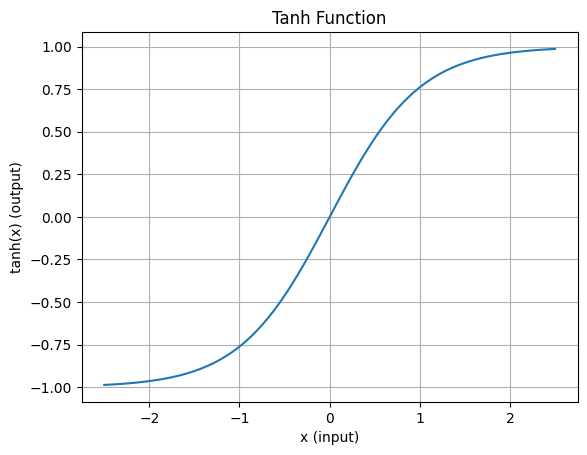

In [ ]:
#visual of tanh function used

import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-2.5, 2.5, 100)  # Create array
y = np.tanh(x)  # Calculate the tanh of each point

plt.plot(x, y)  # Plot the tanh function
plt.xlabel("x (input)")
plt.ylabel("tanh(x) (output)")
plt.title("Tanh Function")
plt.grid(True)
plt.show()  # Display the plot

In [ ]:
'''
Notes on results:
news articles are often written in a very nuetral tone so
results tend to be skewed around the range of 0 to 0.2
reveals biases towards certain groups or topics.
examples:
...



In [ ]:
#Alterations (use articleexception): handle download/parsing errors

In [ ]:
import time
from newspaper import ArticleException

def search_and_analyze(keyword, num_articles=10, recency="qdr:w"):
    results = search(keyword, num=num_articles, tbs=f'nws,qdr:{recency}', tld="com", stop = num_articles)
    sentiments = []
    analyzed_urls = []
    print(f"Searching for '{keyword}'...")

    for url in results:
        try:
            sentiment = analyze_sentiment(url)
            sentiments.append(sentiment)
            analyzed_urls.append(url)
            time.sleep(1) # Add a delay to avoid rate limiting

        except ArticleException as e:
            print(f"Error parsing article from {url}: {e}")
            # Handle the specific ArticleException, maybe skip or retry
        except Exception as e:
            print(f"Unexpected error analyzing article from {url}: {e}")
            print(type(e))
            print(e.args)
            # Log the error or take appropriate action

    print(f"Analyzed URLS: {analyzed_urls}")
    return sentiments